In [ ]:
#import necessary libraries
import pandas as pd


In [ ]:
#load the credit card dataset
df = pd.read_csv("creditcard_csv.csv")

In [ ]:
#Display first few rows to understand the structure
df.head()

In [28]:
import warnings
warnings.filterwarnings('ignore')


In [29]:
#check for missing values
print('missing values:',df.isnull().sum().sum())

missing values: 0


In [30]:
#basic info about dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [31]:
#Descriptive statistics
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [32]:
#column names
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [33]:
print(df['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


In [34]:
X = df.drop('Class',axis = 1)
Y = df['Class']

In [35]:
#check class balance
class_counts = df['Class'].value_counts()
print(class_counts)
print('\n percentage distribution')
print(100*class_counts/len(df))

Class
0    284315
1       492
Name: count, dtype: int64

 percentage distribution
Class
0    99.827251
1     0.172749
Name: count, dtype: float64


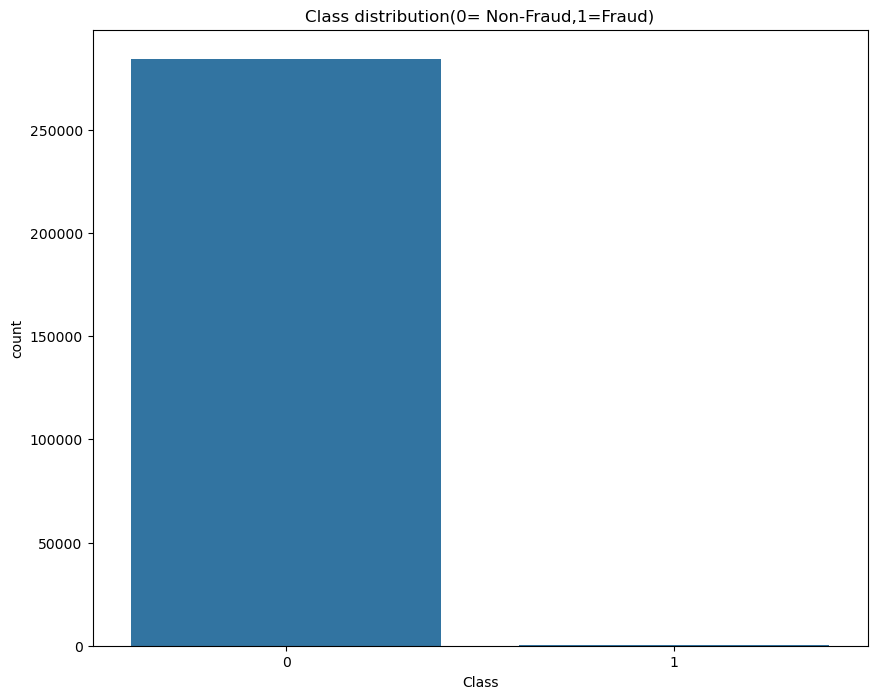

Class
0    284315
1       492
Name: count, dtype: int64


In [36]:
#plot class distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.countplot(x='Class',data=df)
plt.title('Class distribution(0= Non-Fraud,1=Fraud)')
plt.show()
print(df['Class'].value_counts())

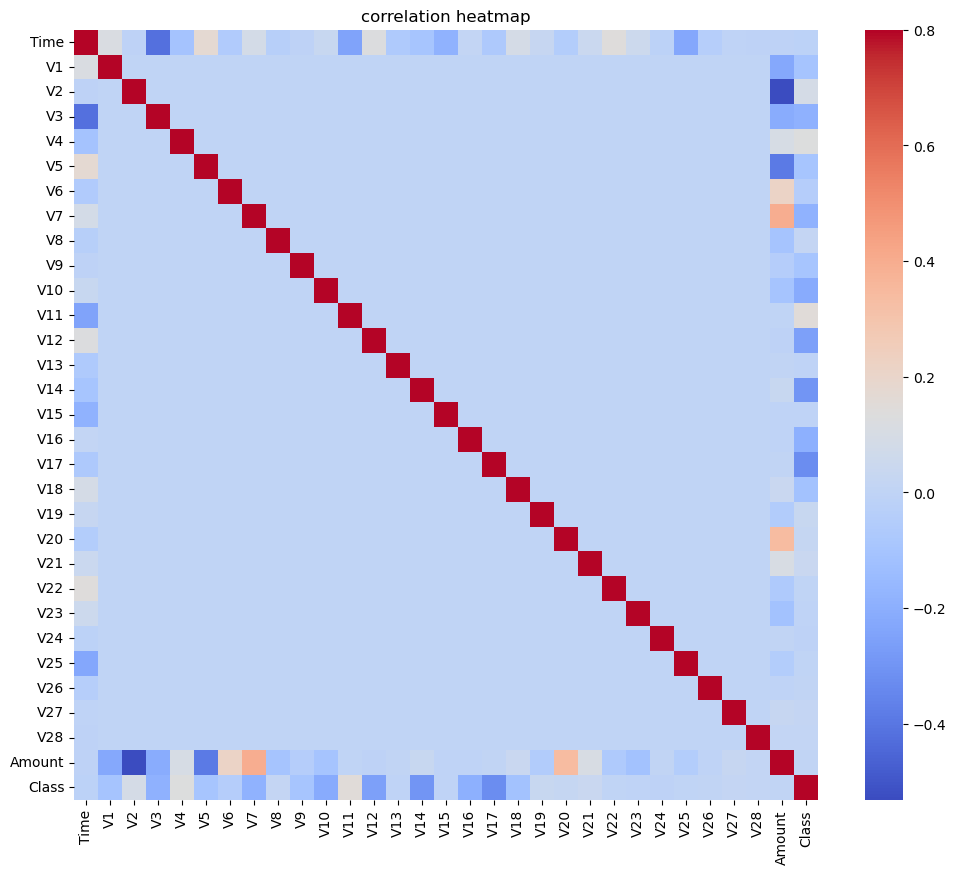

In [37]:
#correlation heatmap
plt.figure(figsize=(12,10))
corr = df.select_dtypes(include = ['number']).corr()

sns.heatmap(corr,cmap = 'coolwarm',vmax = 0.8)
plt.title('correlation heatmap')
plt.show()

In [38]:
X = df.drop('Class',axis = 1)
Y = df['Class']
print('Features shape:',X.shape)
print('Target distribution:')
print(Y.value_counts())

Features shape: (284807, 30)
Target distribution:
Class
0    284315
1       492
Name: count, dtype: int64


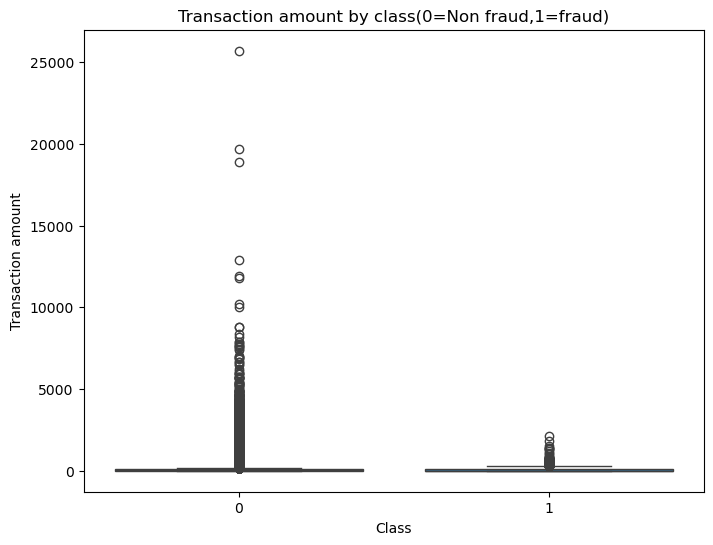

In [39]:
# Boxplot: distribution of amounts by class
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.boxplot(x='Class',y='Amount',data = df)
plt.title('Transaction amount by class(0=Non fraud,1=fraud)')
plt.xlabel('Class')
plt.ylabel('Transaction amount')
plt.show()

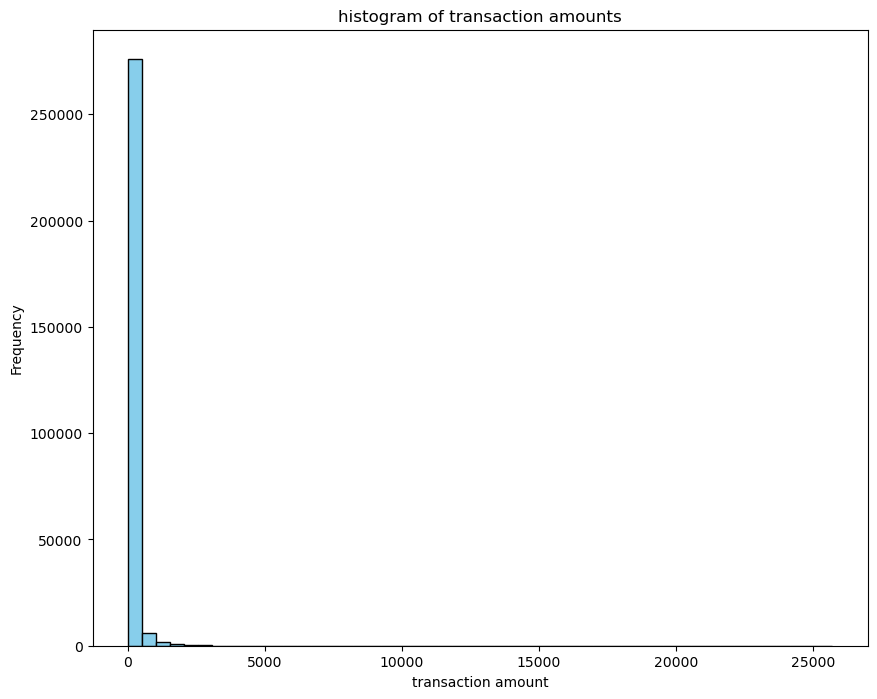

In [40]:
#histogram: distribution of all transaction amounts
plt.figure(figsize=(10,8))
plt.hist(df['Amount'],bins = 50,color = 'skyblue',edgecolor = 'black')
plt.title('histogram of transaction amounts')
plt.xlabel('transaction amount')
plt.ylabel('Frequency')
plt.show()

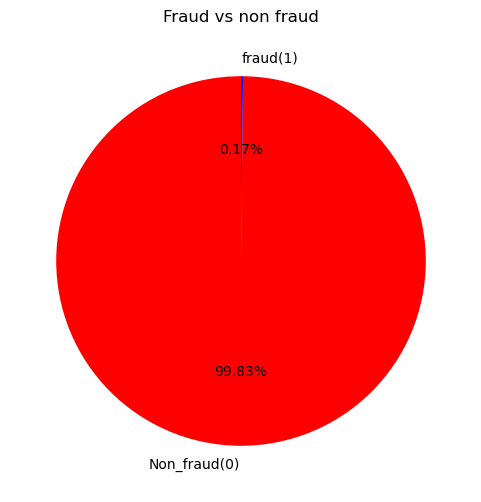

In [41]:
#pie chart: class distribution
counts = df['Class'].value_counts()
plt.figure(figsize = (6,6))
plt.pie(counts,labels = ['Non_fraud(0)','fraud(1)'],autopct = '%1.2f%%',startangle = 90,colors = ['Red','Blue'])
plt.title('Fraud vs non fraud')
plt.show()

In [42]:
print(df['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


In [43]:
#check correlation with target class
df['Class'] = df['Class'].astype(str).str.strip("'").str.strip('"').astype(int)
corr_matrix = df.corr()
target_corr = corr_matrix['Class'].sort_values(ascending = False)
print(target_corr)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


In [44]:
#recheck for missing values
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [45]:
#check unique values in class
print(df['Class'].unique())

[0 1]


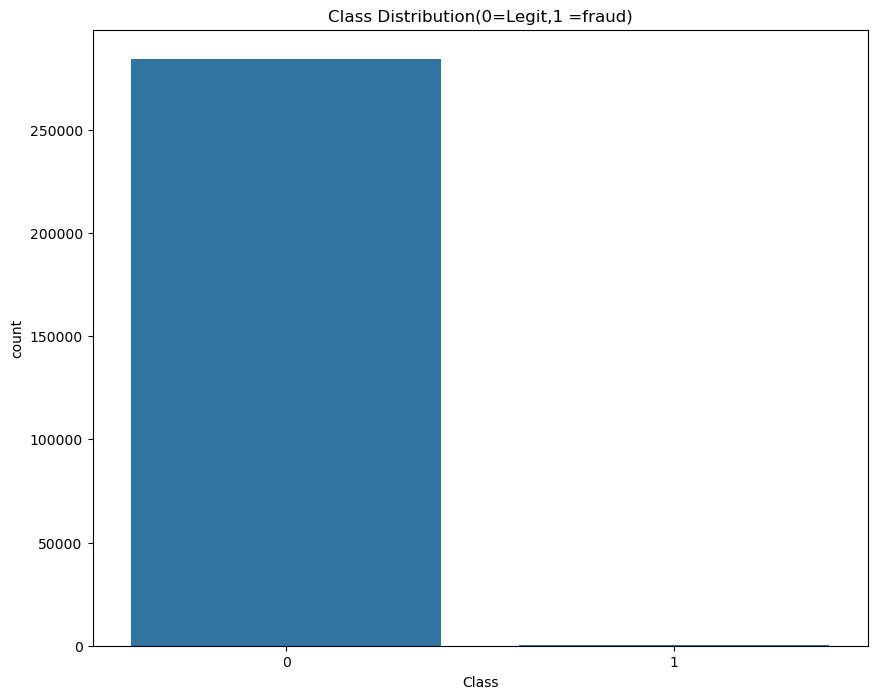

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,8))
sns.countplot(x = 'Class',data = df)
plt.title('Class Distribution(0=Legit,1 =fraud)')
plt.show()


In [47]:
#confirm class ratio again
fraud_ratio = df['Class'].mean()
non_fraud_ratio = 1 - fraud_ratio
print(f"fraud ratio:{fraud_ratio:.4f}")
print(f"non fraud ratio:{non_fraud_ratio:.4f}")

fraud ratio:0.0017
non fraud ratio:0.9983


In [48]:
from sklearn.preprocessing import StandardScaler
X = df.drop(['Class','Time'],axis = 1)
y = df['Class']
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X['Amount'].values.reshape(-1,1))
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4,random_state = 42)
model = LogisticRegression()
model.fit(X_train,y_train)
probabilties = model.predict_proba(X_test)
print("predicted probabilties(legit,fraud):")
print(probabilties)
proba_legit = probabilties[:,0]
proba_fraud = probabilties[:,1]
print("Average legit probabilty(class 0):",proba_legit.mean())
print("Average fraud probabilty(class 1):",proba_fraud.mean())

predicted probabilties(legit,fraud):
[[8.12739862e-07 9.99999187e-01]
 [9.99916820e-01 8.31798917e-05]
 [9.99964752e-01 3.52479390e-05]
 ...
 [9.99879650e-01 1.20349852e-04]
 [9.99794618e-01 2.05381832e-04]
 [9.99866284e-01 1.33716165e-04]]
Average legit probabilty(class 0): 0.9983290122252549
Average fraud probabilty(class 1): 0.0016709877747450711


In [49]:
from collections import Counter
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42,stratify = y)
print("X_train:",X_train)
print("X_test:",X_test)
print("y_train:",y_train)
print("y_test:",y_test)
print("Train class distribution:",Counter(y_train))
print("Test class distribution:",Counter(y_test))

X_train:               V1        V2        V3        V4        V5        V6        V7  \
249927 -0.012102  0.707332  0.163334 -0.756498  0.590999 -0.653429  0.844608   
214082  1.776151 -0.184642 -2.204096  1.191668  0.614461 -1.016525  0.919254   
106005 -1.083391 -4.440527 -1.399530  0.469764 -2.076458 -0.766137  1.601441   
58619  -0.518847  1.025087 -0.614624 -0.780959  2.474666  3.335055  0.046111   
191638 -0.640421  0.212171  0.283341 -1.786916  2.616127  4.024863 -0.198897   
...          ...       ...       ...       ...       ...       ...       ...   
3441   -0.415022  0.713439  1.221551 -2.108216  0.187067 -1.281616  1.118548   
233802  1.993864 -0.516866 -0.620118  0.129845 -0.285128  0.395044 -0.822358   
85418  -1.497933  0.657921  1.581568 -0.024286  0.584698  1.303031  0.609212   
29062   1.069777  0.072105  0.496540  1.505318 -0.380277 -0.370243  0.100551   
17677  -0.598120  0.775041  1.823394  0.312991 -0.096171 -0.391452  0.499351   

              V8        V9    

In [50]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc,classification_report,confusion_matrix
import matplotlib.pyplot as plt
import multiprocessing




Before SMOTE: (199364, 29) Class
0    199020
1       344
Name: count, dtype: int64
After SMOTE: (398040, 29) Class
0    199020
1    199020
Name: count, dtype: int64

Confusion Matrix:
 [[85277    18]
 [   32   116]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.87      0.78      0.82       148

    accuracy                           1.00     85443
   macro avg       0.93      0.89      0.91     85443
weighted avg       1.00      1.00      1.00     85443



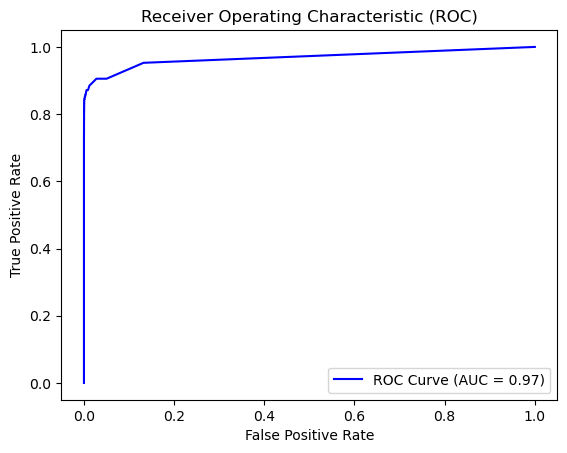

In [53]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import multiprocessing



# Create SMOTE object (remove n_jobs if your imbalanced-learn version is old)
smote = SMOTE(random_state=42)

# Apply SMOTE to training data
X_resampled, Y_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", X_train.shape, y_train.value_counts())
print("After SMOTE:", X_resampled.shape, Y_resampled.value_counts())

# Train Random Forest
model = RandomForestClassifier(random_state=42, n_jobs=-1)
model.fit(X_resampled, Y_resampled)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC curve & AUC
y_probs = model.predict_proba(X_test)[:, 1]  # probability for class 1
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


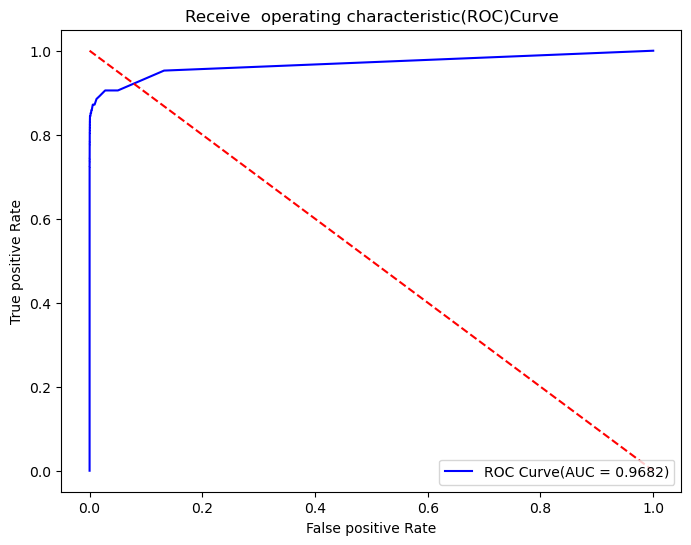

AUC FROM ROC CURVE: 0.9682323113898821


In [54]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
y_probs = model.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_probs)
roc_auc = auc(fpr,tpr)
plt.figure(figsize = (8,6))
plt.plot(fpr,tpr,color = 'blue',label = f"ROC Curve(AUC = {roc_auc:.4f})")
plt.plot([0,1],[1,0],color = 'red', linestyle = '--')
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.title('Receive  operating characteristic(ROC)Curve')
plt.legend(loc = "lower right")
plt.show()
print("AUC FROM ROC CURVE:",roc_auc)

          